# 2016 Olympics in Rio de Janeiro

### This project (Write a Data Science Blog Post) is part of Udacity’s Data Scientist Nanodegree Program.

in this project I will be using 2016 olymipcs dataset to get some insights, and I will follow this process:
* Business understanding
* Data understanding
* Data preparation
* Evaluation


# Business understanding

My questions are:
* What is the age, weight and height with most winners?
* Which country won the most gold medals? 
* What is the ratio between the most winning gold medals country and its players count?

# Data Understanding
The 2016 Olympics dataset I will use is from  <a href="https://www.kaggle.com/rio2016/olympic-games">kaggle.com</a>


In [1]:
## Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
df = pd.read_csv('athletes.csv')
df.shape

(11538, 12)

* The dataset contains 11538 rows and 12 columns

In [3]:
df.head(13)

,id,name,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze,info
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,NaN
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,NaN
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,NaN
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,NaN
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,NaN
5,173071782,Aaron Royle,AUS,male,1990-01-26,1.80,67.0,triathlon,0,0,0,NaN
6,266237702,Aaron Russell,USA,male,1993-06-04,2.05,98.0,volleyball,0,0,1,NaN
7,382571888,Aaron Younger,AUS,male,1991-09-25,1.93,100.0,aquatics,0,0,0,NaN
8,87689776,Aauri Lorena Bokesa,ESP,female,1988-12-14,1.80,62.0,athletics,0,0,0,NaN
9,997877719,Ababel Yeshaneh,ETH,female,1991-07-22,1.65,54.0,athletics,0,0,0,NaN


* The Id column is a unique identfier for each athlete.
* A name.
* The nationality for the athlete
* The data of birth of the athlete
* The gender of the athlete
* The height in meters of the athlete
* The wieght in kilograms of the athlete
* Which type of sport the athelte played
* The medals won by the athlete


# Data preparation


In [4]:
df.isnull().sum()

id                   0
name                 0
nationality          0
sex                  0
date_of_birth        0
height             330
weight             659
sport                0
gold                 0
silver               0
bronze               0
info             11407
dtype: int64

In [5]:
## Drop the information column because it's useless column for my analysis
df = df.drop('info', axis=1)


In [6]:
# Change the date of birth column to age
ref_date = dt.datetime.now()
df['age'] = df['date_of_birth'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y'))) 

In [7]:
# deal with nans values in heigh and weight column 
# df['weight'].isnull()
# Dropping all rows that contains a nan which they are 5% rows of the dataset where drop them will not affect my analysis
df = df.dropna()

In [8]:
df.shape

(10858, 12)

In [9]:
# drop the date of birth column 
df = df.drop('date_of_birth',axis=1)

In [10]:
# The dataset is ready to analyze
df.head()

,id,name,nationality,sex,height,weight,sport,gold,silver,bronze,age
0,736041664,A Jesus Garcia,ESP,male,1.72,64.0,athletics,0,0,0,50
1,532037425,A Lam Shin,KOR,female,1.68,56.0,fencing,0,0,0,33
2,435962603,Aaron Brown,CAN,male,1.98,79.0,athletics,0,0,1,27
3,521041435,Aaron Cook,MDA,male,1.83,80.0,taekwondo,0,0,0,28
4,33922579,Aaron Gate,NZL,male,1.81,71.0,cycling,0,0,0,29


In [11]:
df.describe()

,id,height,weight,gold,silver,bronze,age
count,1.085800e+04,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000
mean,5.011329e+08,1.766942,72.070915,0.059772,0.058482,0.058574,29.798397
std,2.909399e+08,0.113111,16.162358,0.260756,0.242387,0.239113,5.396994
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000,17.000000
25%,2.460081e+08,1.690000,60.000000,0.000000,0.000000,0.000000,26.000000
50%,5.020973e+08,1.760000,70.000000,0.000000,0.000000,0.000000,29.000000
75%,7.555681e+08,1.840000,81.000000,0.000000,0.000000,0.000000,33.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000,65.000000


In [12]:
is65 = df['gold'] != 0
is652 = is65.sum()
is652

602

# Question 1

In [13]:
## What is the age with most winners?
gold_medals_age = df.groupby(['age']).sum()['gold'].sort_values(ascending=False).head(5)
gold_medals_age

age
31    64
25    54
29    53
30    50
34    47
Name: gold, dtype: int64

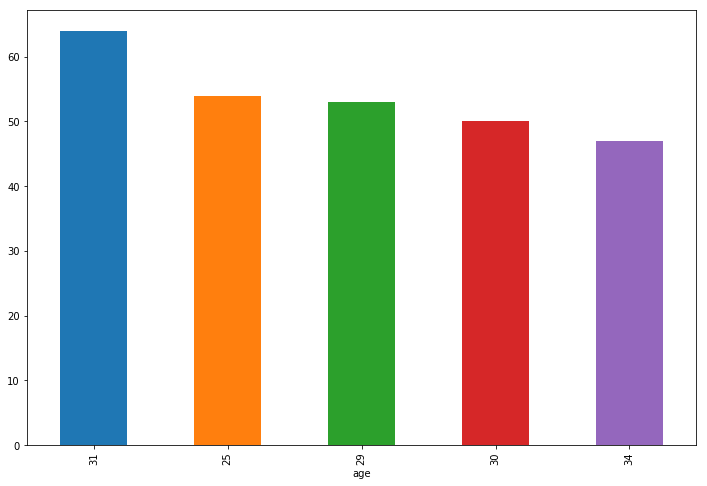

In [14]:
# Plot age with most gold medals
plt.figure(figsize=(12,8))
gold_medals_age.plot(kind="bar")
plt.savefig('gold_medals_age')

In [15]:
# What is the weight with most gold 
gold_medals_weight = df.groupby(['weight']).sum()['gold'].sort_values(ascending=False).head(5)
gold_medals_weight

weight
70.0    32
74.0    24
72.0    23
68.0    22
65.0    22
Name: gold, dtype: int64

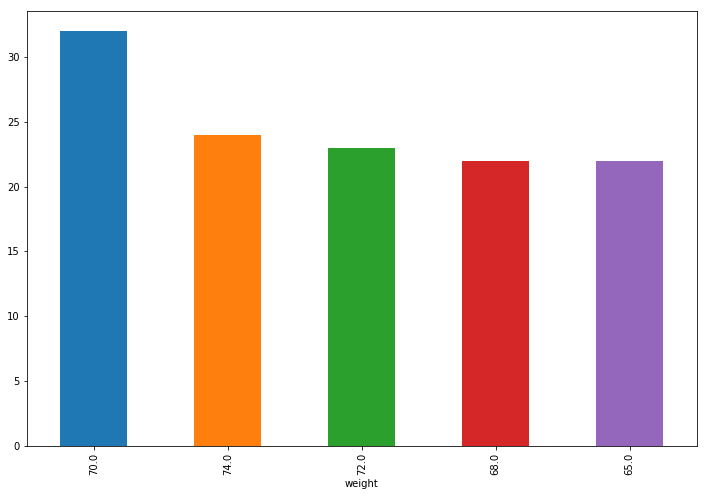

In [16]:
# Plot weight with most gold medals
plt.figure(figsize=(12,8))
gold_medals_weight.plot(kind="bar")
plt.savefig('gold_medals_weight')

In [17]:
# What is the height with most gold 
gold_medals_height = df.groupby(['height']).sum()['gold'].sort_values(ascending=False).head(5)
gold_medals_height

height
1.68    34
1.73    33
1.75    29
1.83    28
1.76    24
Name: gold, dtype: int64

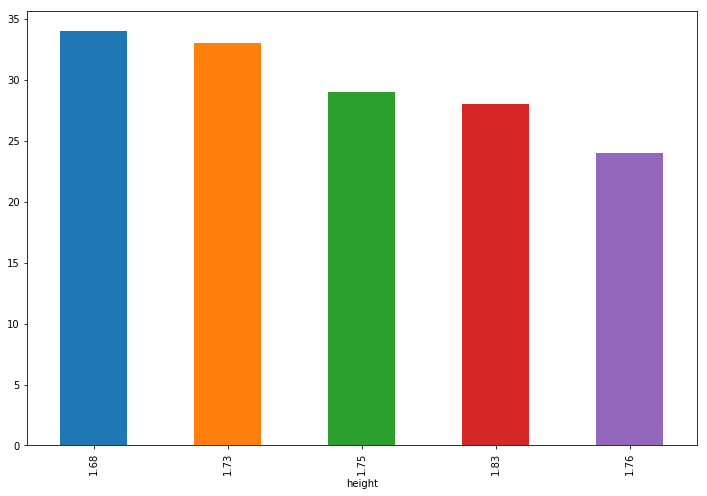

In [18]:
# Plot weight with most gold medals
plt.figure(figsize=(12,8))
gold_medals_height.plot(kind="bar")
plt.savefig('gold_medals_height')

# Evaloution 1

it apperas that the athletes with age 31,25,29,30,34 have won the most gold medals, they won about 40% of the whole gold medals awards. and the weight and height of top 5 gold medal winners vary from 65 to 74 kg and 168 to 183 centimeters.

# Question 2

In [19]:
# Which country won the most gold medals?
country_gold_medals = df.groupby(['nationality']).sum()['gold'].sort_values(ascending=False).head(5)
country_gold_medals

nationality
USA    136
GBR     63
RUS     51
GER     49
CHN     46
Name: gold, dtype: int64

In [20]:
country_gold_medals.tolist

<bound method IndexOpsMixin.tolist of nationality
USA    136
GBR     63
RUS     51
GER     49
CHN     46
Name: gold, dtype: int64>

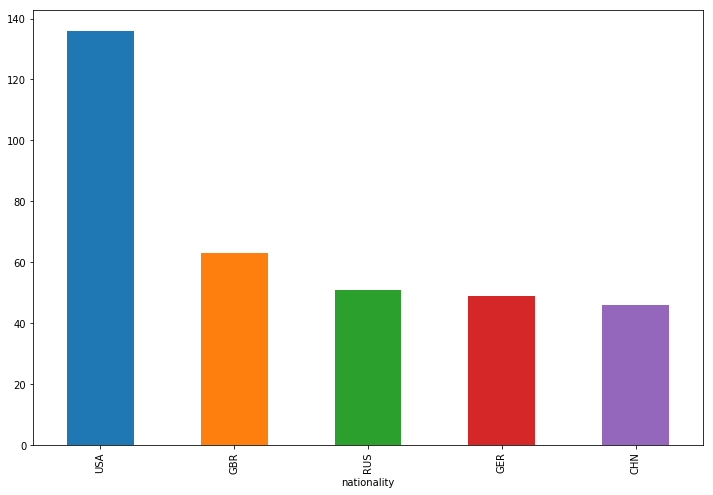

In [21]:
# plot the country with most gold medals
plt.figure(figsize=(12,8))
country_gold_medals.plot(kind="bar")
plt.savefig('country_gold_medals')

# Evaloution 2

USA athletes are the most gold medals winners dispate the idea that some of them are in teams.

# Question 3

In [24]:
# What is the ratio between the most winning gold medals country and its players count?
# number of athletes winning gold medals dispate that some of them are in team which will be counted as 1 gold medal for the country
is_american =  df['nationality']=='USA'
americans_count = is_american.sum()
perc0 = country_gold_medals[0] / americans_count * 100

In [25]:
# let's see other countries
# GBR ratio 
is_britich =  df['nationality']=='GBR'
british_count = is_britich.sum()
perc1 = country_gold_medals[1] / british_count * 100

In [26]:
# Russian ratio
is_russian =  df['nationality']=='RUS'
russian_count = is_russian.sum()
perc2 = country_gold_medals[2] / russian_count * 100

In [27]:
# German ratio
is_german =  df['nationality']=='GER'
german_count = is_german.sum()
perc3 = country_gold_medals[3] / german_count * 100

In [29]:
# Chinese ratio
is_chinese =  df['nationality']=='CHN'
chinese_count = is_chinese.sum()
perc4 = country_gold_medals[4] / chinese_count * 100

In [35]:
ratio_dict = {'Country': ['USA','GBR', 'RUS','GER', 'CHN'],
                    'Ratio': [perc0,perc1,perc2,perc3,perc4]}
ratio_df = pd.DataFrame(ratio_dict,columns= ['Country', 'Ratio'])
ratio_df

,Country,Ratio
0,USA,24.637681
1,GBR,17.696629
2,RUS,19.318182
3,GER,11.264368
4,CHN,11.704835


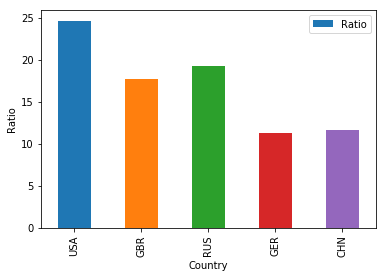

In [34]:
ratio_df.plot(kind='bar',x='Country',y='Ratio')
plt.ylabel('Ratio')
plt.savefig('Ratio_figure')

# Evaloution 3

The higher count of players country have the higher chances to get a medal,
24% of the usa players won gold medals